In [1]:
#Подключение библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import simplefilter

simplefilter('ignore')

In [2]:
#Подгружаем DataSet
FIFA_dataset = pd.read_csv('FIFA.csv', encoding='latin-1') 

In [3]:
FIFA_dataset

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,â¬143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,â¬113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,â¬165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,â¬143K


In [4]:
FIFA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿                       18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
#категоральный признаков в датасете слишком много, они будут мешать делать масштабирование данных.
#Оставим только те столбцы, с которопыми потом будем работать
FIFA_dataset_new = FIFA_dataset[['ID', 'Age', 'Overall', "Potential", "Name", "Photo", "Nationality", "Flag"]].copy()
FIFA_dataset_new

,ID,Age,Overall,Potential,Name,Photo,Nationality,Flag
0,158023,31,94,94,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png
1,20801,33,94,94,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png
2,190871,26,92,93,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png
3,193080,27,91,93,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png
4,192985,27,91,92,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png
...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,J. Lundstram,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png
18203,243165,19,47,63,N. Christoffersson,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png
18204,241638,16,47,67,B. Worman,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png
18205,246268,17,47,66,D. Walker-Rice,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png


In [7]:
#Кодирование категориальных признаков
FIFA_dataset_new["Name"].value_counts()
FIFA_dataset_new["Name"] = FIFA_dataset_new["Name"].astype('category')

FIFA_dataset_new["Photo"] = FIFA_dataset_new["Photo"].astype('category')
FIFA_dataset_new["Nationality"] = FIFA_dataset_new["Nationality"].astype('category')
FIFA_dataset_new["Flag"] = FIFA_dataset_new["Flag"].astype('category')

#Назначить закодированную переменную новосу столбцу с помощью метода доступа
FIFA_dataset_new["Name_cat"] = FIFA_dataset_new["Name"].cat.codes
FIFA_dataset_new["Photo_cat"] = FIFA_dataset_new["Photo"].cat.codes
FIFA_dataset_new["Nationality_cat"] = FIFA_dataset_new["Nationality"].cat.codes
FIFA_dataset_new["Flag_cat"] = FIFA_dataset_new["Flag"].cat.codes

FIFA_dataset_cat = FIFA_dataset_new.drop(['Name', 'Photo', 'Nationality', 'Flag'], axis=1, inplace=True)

FIFA_dataset_new

,ID,Age,Overall,Potential,Name_cat,Photo_cat,Nationality_cat,Flag_cat
0,158023,31,94,94,9632,566,6,122
1,20801,33,94,94,3153,6031,123,107
2,190871,26,92,93,12508,3131,20,124
3,193080,27,91,93,4136,3467,139,114
4,192985,27,91,92,8617,3452,13,137
...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,7580,14347,46,40
18203,243165,19,47,63,12101,16252,144,115
18204,241638,16,47,67,2133,15506,46,40
18205,246268,17,47,66,3997,17998,46,40


In [8]:
#разделение выборки
from sklearn.model_selection import train_test_split
y = FIFA_dataset_new['Age']
X = FIFA_dataset_new.drop('Age', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train

,ID,Overall,Potential,Name_cat,Photo_cat,Nationality_cat,Flag_cat
6291,201138,69,72,17019,4614,55,68
12013,181491,64,64,12081,1814,8,78
9753,241115,66,78,13508,15287,158,131
12705,239523,63,71,11429,14627,59,85
5004,203588,70,70,13466,5134,37,151
...,...,...,...,...,...,...,...
6400,195020,69,70,3378,3776,46,40
15288,237818,60,71,12027,14023,6,122
11513,240511,64,77,6537,15041,13,137
1688,214076,75,75,12460,7488,158,131


In [9]:
y_train

6291     26
12013    30
9753     21
12705    23
5004     27
         ..
6400     27
15288    20
11513    19
1688     34
5994     29
Name: Age, Length: 12744, dtype: int64

In [10]:
#Масштбирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_train.columns)
x_train.describe()

,ID,Overall,Potential,Name_cat,Photo_cat,Nationality_cat,Flag_cat
count,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000
mean,0.868855,0.421430,0.494871,0.498019,0.500269,0.467034,0.560302
std,0.121885,0.143599,0.129891,0.287196,0.288367,0.294190,0.227823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.812567,0.333333,0.404255,0.250785,0.250275,0.214724,0.386503
50%,0.899541,0.416667,0.489362,0.494561,0.501565,0.361963,0.631902
75%,0.959086,0.520833,0.574468,0.744547,0.750055,0.754601,0.748466
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Обучение KNN с производным k

simplefilter('ignore')

def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    
def print_cv_result(cv_model, x_test, y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(y_test, cv_model.predict(x_test))
    print()
base_k = 7
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(x_train, y_train)
y_pred_base = base_knn.predict(x_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(y_test, y_pred_base)

Test metrics for KNN with k=7

R^2: 0.8166653972347018
MSE: 3.9743767908041856
MAE: 1.462121806438116


In [12]:
#Кросс валидация
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(x_train, y_train)
        print_cv_result(knn_cv, x_test, y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.8095840296479139
Лучший параметр: {'n_neighbors': 6}
Метрики на тестовом наборе
R^2: 0.8144504474035854
MSE: 4.02239306852157
MAE: 1.4703764720239185

Оптимизация метрики neg_mean_squared_error: -4.160861419338133
Лучший параметр: {'n_neighbors': 6}
Метрики на тестовом наборе
R^2: 0.8144504474035854
MSE: 4.02239306852157
MAE: 1.4703764720239185

Оптимизация метрики neg_mean_absolute_error: -1.5084448113675264
Лучший параметр: {'n_neighbors': 6}
Метрики на тестовом наборе
R^2: 0.8144504474035854
MSE: 4.02239306852157
MAE: 1.4703764720239185

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.8125512978309442
Лучший параметр: {'n_neighbors': 8}
Метрики на тестовом наборе
R^2: 0.8162869124407597
MSE: 3.9825816858868754
MAE: 1.460781621819513

Оптимизация метрики neg_mean_squared_error: -4.092533715409241
Лучший параметр: {'n_neighbors': 8}
Метрики на тестовом наборе
R^2: 0.8162869124407597
MSE: 3.9825816858868754


In [13]:
best_k = 9
y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train).predict(x_test)

In [14]:
#Сравнение исходной и оптимальной модели
print('Исходная модель\n')
print_metrics(y_test, y_pred_base)
print('\nОптимальная модель\n')
print_metrics(y_test, y_pred_best)

Исходная модель

R^2: 0.8166653972347018
MSE: 3.9743767908041856
MAE: 1.462121806438116

Оптимальная модель

R^2: 0.8159536739784954
MSE: 3.9898057188312848
MAE: 1.4651087111273822


In [15]:
#Визуализация результатов
res = pd.DataFrame({'y_test': y_test, 'y_pred_best': y_pred_best}).sort_values(by='y_test')
res.head()

,y_test,y_pred_best
16418,16,18.222222
15363,16,17.444444
18162,16,17.777778
12496,16,18.444444
17200,16,19.000000


<AxesSubplot:xlabel='Age'>

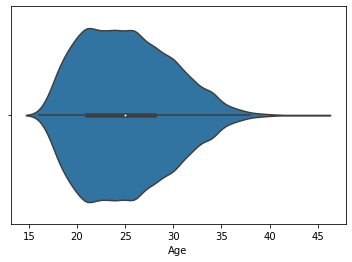

In [18]:
sns.violinplot(x=FIFA_dataset_new['Age'])